In [3]:
#Import important Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [5]:
#Import CSV

In [6]:
df=pd.read_csv('microcredit.csv')

In [7]:
#Data Exploration

In [8]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [9]:
#To remove the Unnamed column

In [10]:
df=df.drop(['Unnamed: 0'],axis=1)

In [11]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [12]:
#To understand the data shape

In [13]:
df.shape

(209593, 36)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [15]:
#Data Cleaning , analysis and visualization

In [16]:
#As the problem has already stated that there are no Null values

In [17]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [19]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [20]:
#From the above we can see that data is imbalanced and has outliers.Lets check it for few columns to visualise . we will work on scaling the data later

{'whiskers': [<matplotlib.lines.Line2D at 0x21601f8af40>,
 'caps': [<matplotlib.lines.Line2D at 0x21601fa0670>,
 'boxes': [<matplotlib.lines.Line2D at 0x21601f8abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x21601fa0d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x21601fa9070>],
 'means': []}

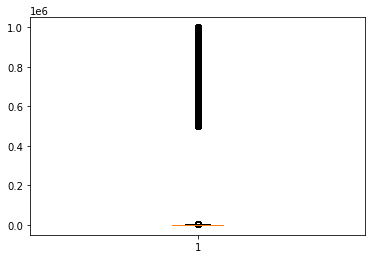

In [21]:
fig,ax=plt.subplots()
ax.boxplot(df["aon"])

In [22]:
#To treat outliers

In [23]:
median=df["aon"].median()

In [24]:
median

527.0

In [32]:
df["aon"]=df["aon"].mask(df["aon"]>527.0,median)

{'whiskers': [<matplotlib.lines.Line2D at 0x21602077220>,
 'caps': [<matplotlib.lines.Line2D at 0x216020778e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2160206ae80>],
 'medians': [<matplotlib.lines.Line2D at 0x21602077fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2160207e2e0>],
 'means': []}

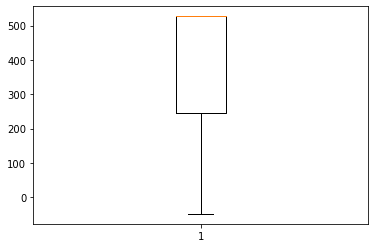

In [26]:
fig,ax=plt.subplots()
ax.boxplot(df["aon"])

In [27]:
#We can see that outlier is removed hence we will proceed to check on other columns as well

{'whiskers': [<matplotlib.lines.Line2D at 0x216020cb820>,
 'caps': [<matplotlib.lines.Line2D at 0x216020cbee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x216020cb520>],
 'medians': [<matplotlib.lines.Line2D at 0x216020d65e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x216020d68e0>],
 'means': []}

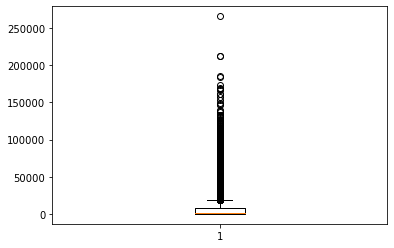

In [28]:
fig,ax=plt.subplots()
ax.boxplot(df["daily_decr30"])

In [29]:
median1=df["daily_decr30"].median()

In [30]:
median1

1469.17566666667

In [33]:
df["daily_decr30"]=df["daily_decr30"].mask(df["daily_decr30"]>1469.17566666667,median1)

{'whiskers': [<matplotlib.lines.Line2D at 0x21602175e50>,
 'caps': [<matplotlib.lines.Line2D at 0x21602183550>,
 'boxes': [<matplotlib.lines.Line2D at 0x21602175af0>],
 'medians': [<matplotlib.lines.Line2D at 0x21602183c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21602183f10>],
 'means': []}

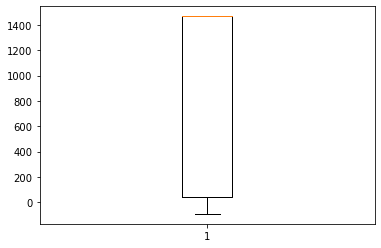

In [34]:
fig,ax=plt.subplots()
ax.boxplot(df["daily_decr30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c25b9d00>,
 'caps': [<matplotlib.lines.Line2D at 0x196c25c7400>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c25b99a0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c25c7ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c25c7dc0>],
 'means': []}

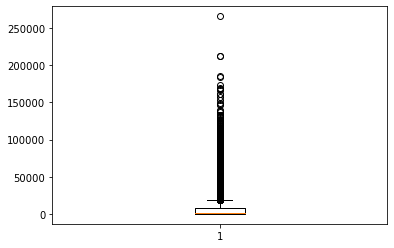

In [20]:
fig,ax=plt.subplots()
ax.boxplot(df["daily_decr30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c261c790>,
 'caps': [<matplotlib.lines.Line2D at 0x196c261ce50>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c261c430>],
 'medians': [<matplotlib.lines.Line2D at 0x196c2626550>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c2626850>],
 'means': []}

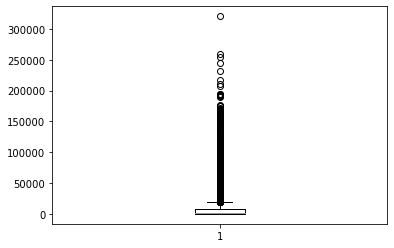

In [21]:
fig,ax=plt.subplots()
ax.boxplot(df["daily_decr90"])

In [35]:
median2=df["daily_decr90"].median()

In [36]:
median2

1500.0

In [37]:
df["daily_decr90"]=df["daily_decr90"].mask(df["daily_decr90"]>1500.0,median2)

{'whiskers': [<matplotlib.lines.Line2D at 0x216021d3dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x216021e04c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x216021d3a60>],
 'medians': [<matplotlib.lines.Line2D at 0x216021e0b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x216021e0e80>],
 'means': []}

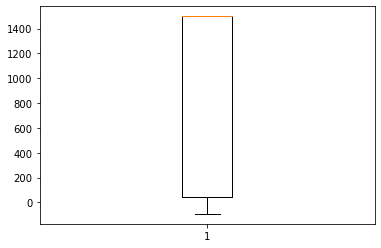

In [38]:
fig,ax=plt.subplots()
ax.boxplot(df["daily_decr90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c267a4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x196c267abb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c267a190>],
 'medians': [<matplotlib.lines.Line2D at 0x196c26852b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c26855b0>],
 'means': []}

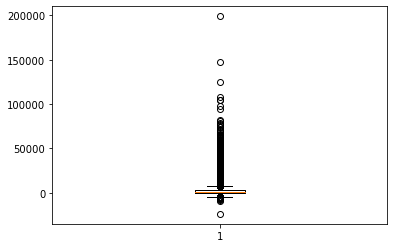

In [22]:
fig,ax=plt.subplots()
ax.boxplot(df["rental30"])

In [93]:
median12=df["rental30"].median()

In [94]:
median12

1083.57

In [95]:
df["rental30"]=df["rental30"].mask(df["rental30"]>1083,median12)

{'whiskers': [<matplotlib.lines.Line2D at 0x21608ecd9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21608eda0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21608ecd640>],
 'medians': [<matplotlib.lines.Line2D at 0x21608eda760>],
 'fliers': [<matplotlib.lines.Line2D at 0x21608edaa60>],
 'means': []}

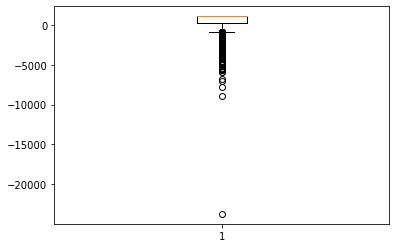

In [96]:
fig,ax=plt.subplots()
ax.boxplot(df["rental30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c257e730>,
 'caps': [<matplotlib.lines.Line2D at 0x196c2594d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c257e7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c25e2dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c24e9280>],
 'means': []}

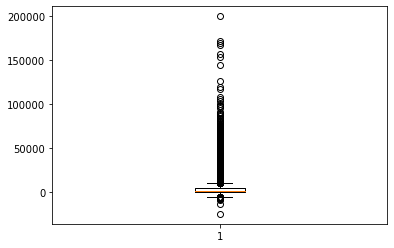

In [23]:
fig,ax=plt.subplots()
ax.boxplot(df["rental90"])

In [97]:
median13=df["rental90"].median()

In [98]:
median13

1334.0

In [99]:
df["rental90"]=df["rental90"].mask(df["rental90"]>1334.0,median13)

{'whiskers': [<matplotlib.lines.Line2D at 0x21608f25820>,
 'caps': [<matplotlib.lines.Line2D at 0x21608f25ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21608f254c0>],
 'medians': [<matplotlib.lines.Line2D at 0x21608f305e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21608f308e0>],
 'means': []}

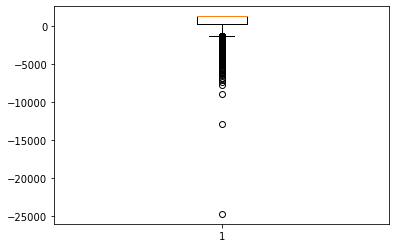

In [100]:
fig,ax=plt.subplots()
ax.boxplot(df["rental90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c27271c0>,
 'caps': [<matplotlib.lines.Line2D at 0x196c2727880>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c271ae20>],
 'medians': [<matplotlib.lines.Line2D at 0x196c2727f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c2732280>],
 'means': []}

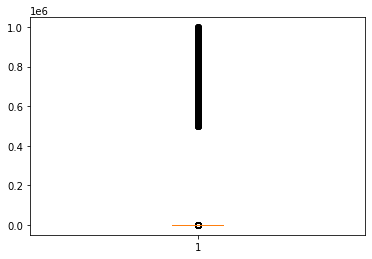

In [24]:
fig,ax=plt.subplots()
ax.boxplot(df["last_rech_date_ma"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c277a520>,
 'caps': [<matplotlib.lines.Line2D at 0x196c277abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c277a1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c27832e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c27835e0>],
 'means': []}

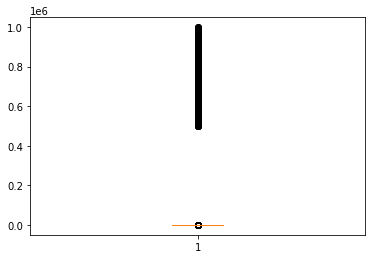

In [25]:
fig,ax=plt.subplots()
ax.boxplot(df["last_rech_date_da"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c27cba90>,
 'caps': [<matplotlib.lines.Line2D at 0x196c27d8190>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c27cb730>],
 'medians': [<matplotlib.lines.Line2D at 0x196c27d8850>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c27d8b50>],
 'means': []}

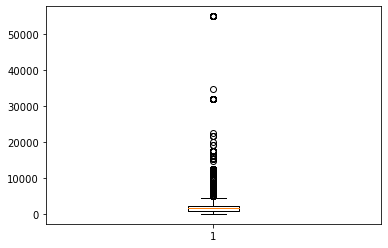

In [26]:
fig,ax=plt.subplots()
ax.boxplot(df["last_rech_amt_ma"])

In [87]:
median11=df["last_rech_amt_ma"].median()

In [88]:
median11

1539.0

In [89]:
df["last_rech_amt_ma"]=df["last_rech_amt_ma"].mask(df["last_rech_amt_ma"]>1539.0,median11)

{'whiskers': [<matplotlib.lines.Line2D at 0x21608e566a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21608e56d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21608e56340>],
 'medians': [<matplotlib.lines.Line2D at 0x21608e4a460>],
 'fliers': [<matplotlib.lines.Line2D at 0x21608e4a760>],
 'means': []}

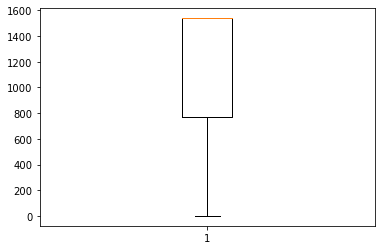

In [90]:
fig,ax=plt.subplots()
ax.boxplot(df["last_rech_amt_ma"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c3180fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x196c318d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c3180c40>],
 'medians': [<matplotlib.lines.Line2D at 0x196c318dd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c319a0a0>],
 'means': []}

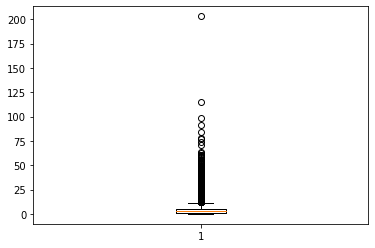

In [27]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_ma_rech30"])

In [83]:
median10=df['cnt_ma_rech30'].median()

In [84]:
median10

3.0

In [85]:
df["cnt_ma_rech30"]=df["cnt_ma_rech30"].mask(df["cnt_ma_rech30"]>3.0,median10)

{'whiskers': [<matplotlib.lines.Line2D at 0x21608e0ee20>,
 'caps': [<matplotlib.lines.Line2D at 0x21608e1c520>,
 'boxes': [<matplotlib.lines.Line2D at 0x21608e0eac0>],
 'medians': [<matplotlib.lines.Line2D at 0x21608e1cbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21608e1cee0>],
 'means': []}

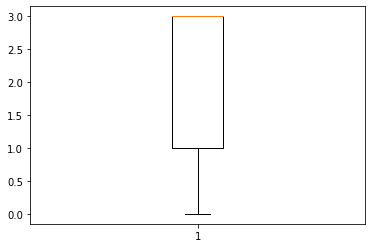

In [86]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_ma_rech30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c31e7520>,
 'caps': [<matplotlib.lines.Line2D at 0x196c31e7be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c31e71c0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c31f22e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c31f25e0>],
 'means': []}

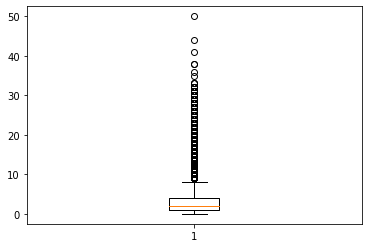

In [28]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_loans30"])

In [79]:
median9=df["cnt_loans30"].median()

In [80]:
median9

2.0

In [81]:
df["cnt_loans30"]=df["cnt_loans30"].mask(df["cnt_loans30"]>2.0,median9)

{'whiskers': [<matplotlib.lines.Line2D at 0x21608d99b50>,
 'caps': [<matplotlib.lines.Line2D at 0x21608dc0250>,
 'boxes': [<matplotlib.lines.Line2D at 0x21608d997f0>],
 'medians': [<matplotlib.lines.Line2D at 0x21608dc0910>],
 'fliers': [<matplotlib.lines.Line2D at 0x21608dc0c10>],
 'means': []}

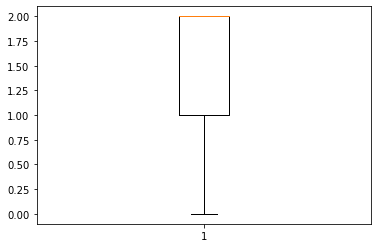

In [82]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_loans30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c323ba30>,
 'caps': [<matplotlib.lines.Line2D at 0x196c3248130>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c323b6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c32487f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c3248af0>],
 'means': []}

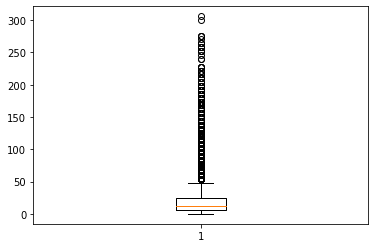

In [29]:
fig,ax=plt.subplots()
ax.boxplot(df["amnt_loans30"])

In [75]:
median8=df['amnt_loans30'].median()

In [76]:
median8

12.0

In [77]:
df["amnt_loans30"]=df["amnt_loans30"].mask(df["amnt_loans30"]>12.0,median8)

{'whiskers': [<matplotlib.lines.Line2D at 0x21608d60280>,
 'caps': [<matplotlib.lines.Line2D at 0x21608d60940>,
 'boxes': [<matplotlib.lines.Line2D at 0x21608d53ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x21608d6a040>],
 'fliers': [<matplotlib.lines.Line2D at 0x21608d6a340>],
 'means': []}

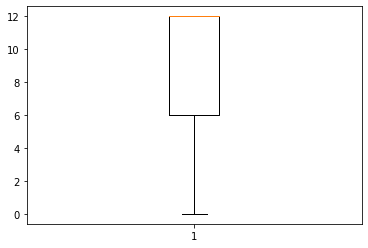

In [78]:
fig,ax=plt.subplots()
ax.boxplot(df["amnt_loans30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c329a4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x196c329abb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c329a190>],
 'medians': [<matplotlib.lines.Line2D at 0x196c32a52b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c32a55b0>],
 'means': []}

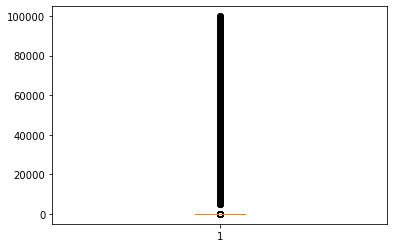

In [30]:
fig,ax=plt.subplots()
ax.boxplot(df["maxamnt_loans30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21608cff940>,
 'caps': [<matplotlib.lines.Line2D at 0x21608d09040>,
 'boxes': [<matplotlib.lines.Line2D at 0x21608cff5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x21608d09700>],
 'fliers': [<matplotlib.lines.Line2D at 0x21608d09a00>],
 'means': []}

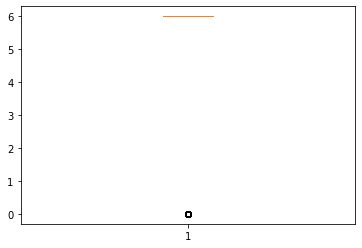

In [74]:
fig,ax=plt.subplots()
ax.boxplot(df["maxamnt_loans30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c32eea30>,
 'caps': [<matplotlib.lines.Line2D at 0x196c4eba130>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c32ee6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c4eba7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c4ebaaf0>],
 'means': []}

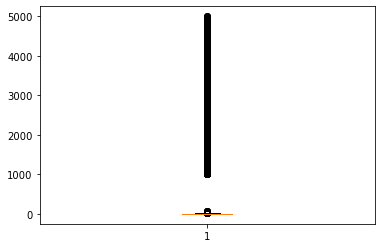

In [31]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_loans90"])

In [67]:
median7=df["cnt_loans90"].median()

In [68]:
median7

2.0

In [69]:
df["cnt_loans90"]=df["cnt_loans90"].mask(df["cnt_loans90"]>2.0,median7)

{'whiskers': [<matplotlib.lines.Line2D at 0x21608ca25b0>,
 'caps': [<matplotlib.lines.Line2D at 0x21608ca2c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x21608ca2250>],
 'medians': [<matplotlib.lines.Line2D at 0x21608cad370>],
 'fliers': [<matplotlib.lines.Line2D at 0x21608cad670>],
 'means': []}

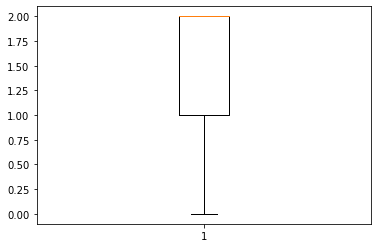

In [70]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_loans90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c4f02f40>,
 'caps': [<matplotlib.lines.Line2D at 0x196c4f10640>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c4f02be0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c4f10d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c4f1a040>],
 'means': []}

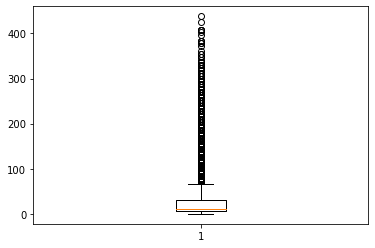

In [32]:
fig,ax=plt.subplots()
ax.boxplot(df["amnt_loans90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c4f58ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x196c4f655e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c4f58b80>],
 'medians': [<matplotlib.lines.Line2D at 0x196c4f65ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c4f65fa0>],
 'means': []}

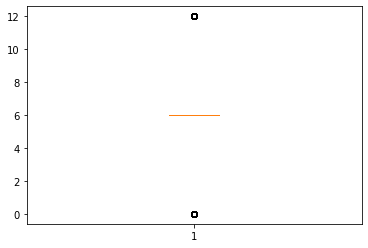

In [33]:
fig,ax=plt.subplots()
ax.boxplot(df["maxamnt_loans90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x196c4fb7940>,
 'caps': [<matplotlib.lines.Line2D at 0x196c4fc2040>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c4fb75e0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c4fc2700>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c4fc2a00>],
 'means': []}

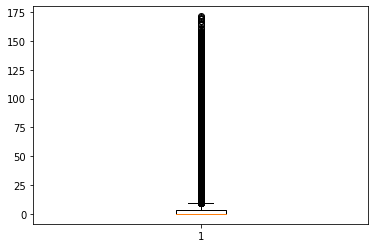

In [34]:
fig,ax=plt.subplots()
ax.boxplot(df["payback30"])

In [53]:
median6=df["payback90"].median()

In [54]:
median6

1.6666666666666698

In [55]:
df["payback90"]=df["payback90"].mask(df["payback90"]>1.66,median6)

{'whiskers': [<matplotlib.lines.Line2D at 0x216023a61f0>,
 'caps': [<matplotlib.lines.Line2D at 0x216023a68b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21602397e50>],
 'medians': [<matplotlib.lines.Line2D at 0x216023a6f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x216023ae2b0>],
 'means': []}

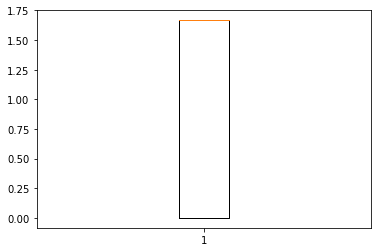

In [56]:
fig,ax=plt.subplots()
ax.boxplot(df["payback90"])

In [36]:
#Lets also visualize on the target variable which is label in this case

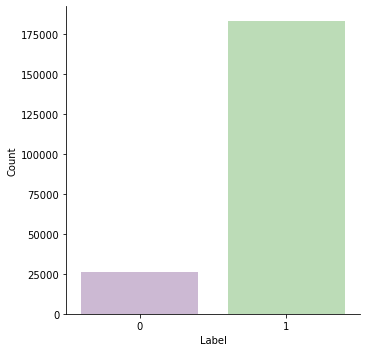

In [101]:
g=sns.catplot(x="label",data=df,kind="count",palette="PRGn",alpha=1)
g.set(xlabel="Label",ylabel="Count")
plt.show()

In [38]:
#Correlation matrix: To figure out which data is most closely related

In [102]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.100957,0.182910,0.183819,0.106085,0.113230,0.037004,0.001711,0.275742,0.366925,...,0.241028,0.257536,-0.047352,0.044589,0.267074,0.199788,-0.037469,0.035747,NaN,0.281385
aon,0.100957,1.000000,0.102231,0.101988,0.062048,0.069372,0.032604,0.002271,0.090256,0.063430,...,0.090936,0.093648,0.000632,-0.005773,0.116982,0.099071,0.014474,-0.014204,NaN,0.137800
daily_decr30,0.182910,0.102231,1.000000,0.999331,0.442096,0.505741,0.160002,-0.001363,0.271157,0.344509,...,0.197808,0.252009,-0.097584,0.017473,0.294072,0.370709,-0.072907,-0.016060,NaN,0.350210
daily_decr90,0.183819,0.101988,0.999331,1.000000,0.442409,0.506619,0.160407,-0.001306,0.271939,0.343185,...,0.196198,0.250598,-0.100463,0.017719,0.293582,0.370646,-0.075221,-0.016116,NaN,0.350206
rental30,0.106085,0.062048,0.442096,0.442409,1.000000,0.965584,0.098786,0.002385,0.223696,0.380281,...,0.241788,0.257451,-0.036048,-0.030403,0.281616,0.329970,-0.028414,-0.052080,NaN,0.333667
rental90,0.113230,0.069372,0.505741,0.506619,0.965584,1.000000,0.115032,0.002166,0.232063,0.370178,...,0.228042,0.248381,-0.062166,-0.023420,0.285669,0.340559,-0.046561,-0.049604,NaN,0.343414
last_rech_date_ma,0.037004,0.032604,0.160002,0.160407,0.098786,0.115032,1.000000,0.001433,0.232706,0.125704,...,0.090458,0.095514,-0.030237,0.006108,0.123596,0.037166,-0.020972,-0.002194,NaN,0.092334
last_rech_date_da,0.001711,0.002271,-0.001363,-0.001306,0.002385,0.002166,0.001433,1.000000,-0.002282,0.001186,...,0.000970,0.000562,0.003949,0.000061,-0.000731,0.000519,0.001417,-0.002239,NaN,-0.000860
last_rech_amt_ma,0.275742,0.090256,0.271157,0.271939,0.223696,0.232063,0.232706,-0.002282,1.000000,0.454179,...,0.260377,0.273544,-0.030797,0.012452,0.305397,0.179270,-0.019277,-0.002172,NaN,0.279815
cnt_ma_rech30,0.366925,0.063430,0.344509,0.343185,0.380281,0.370178,0.125704,0.001186,0.454179,1.000000,...,0.589093,0.584215,0.039841,-0.045488,0.585808,0.449445,0.033224,-0.061017,NaN,0.617641


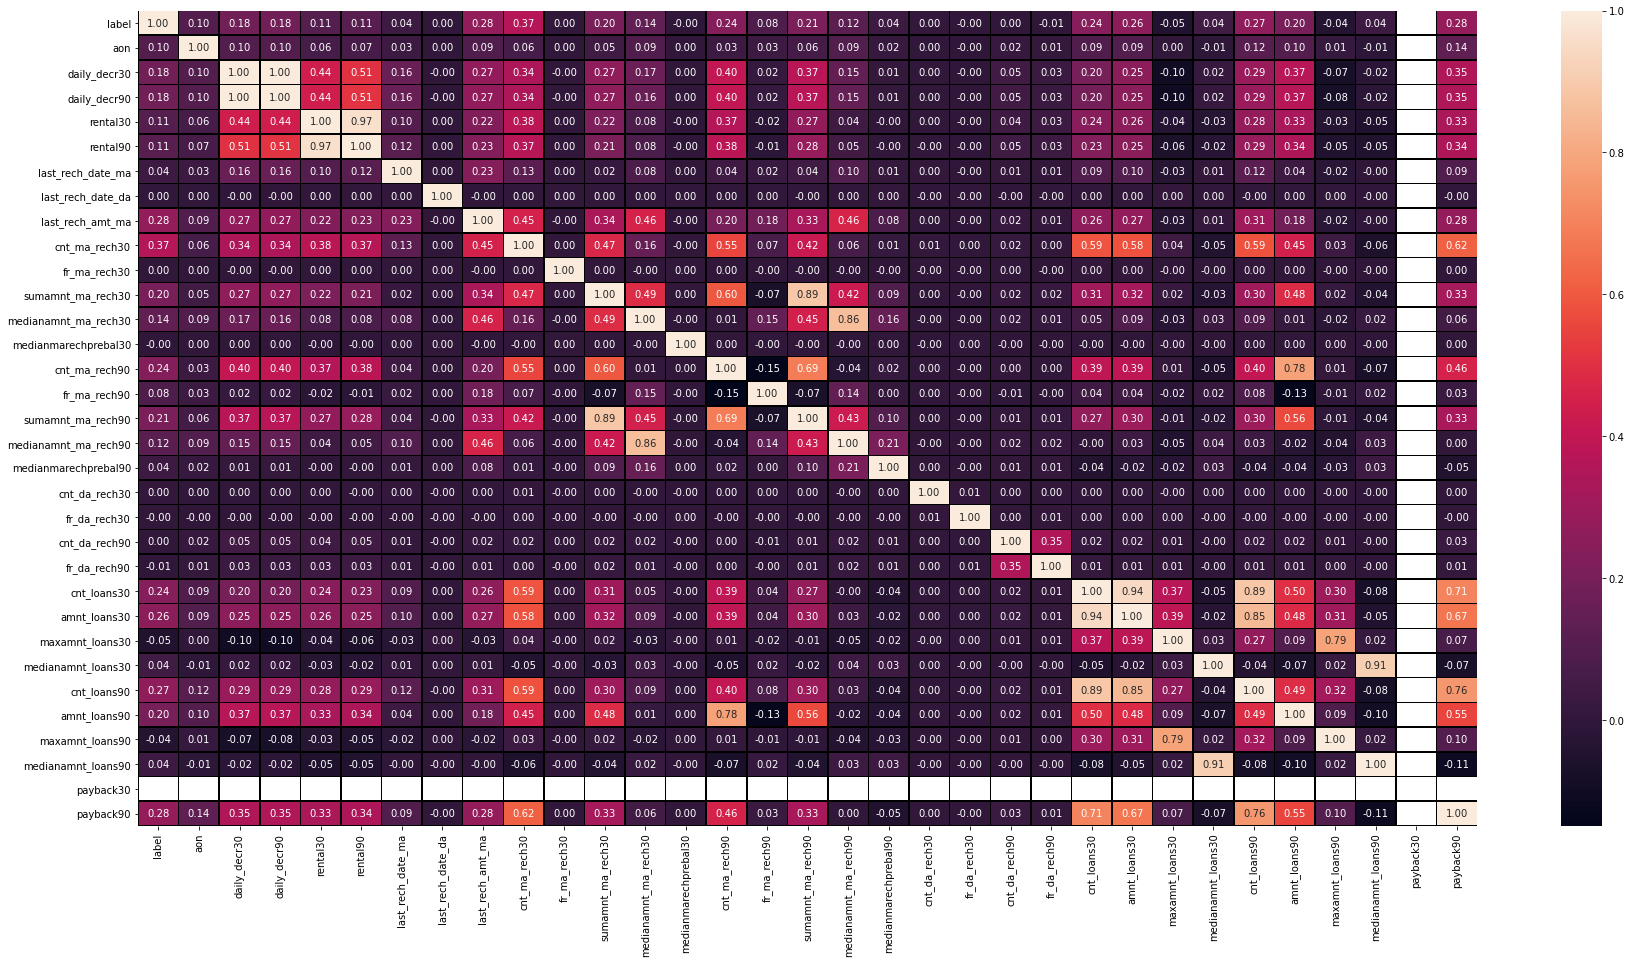

In [103]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,linewidth=.5,linecolor="black",fmt='.2f')

In [104]:
#Since we have around 36 features its important for us to select the most important ones and also few of them are redundant.From the correlation matrix above selecting the below important columns

In [105]:
#Normalizing the data because of the outliers.Also after checking the correlation. filtering out the most important columns

In [106]:
 num = df._get_numeric_data()

In [107]:
num[num < 0] = 0

In [108]:
Xsel=num
Ysel=df.iloc[:,0]

In [109]:
Xsel.__delitem__('label')

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [111]:
bestfeatures=SelectKBest(score_func=chi2,k=20)

In [112]:
fit=bestfeatures.fit(Xsel,Ysel)

In [113]:
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(Xsel.columns)

In [114]:
featureScores=pd.concat([datacolumns,datascores],axis=1)
featureScores.columns=['Specs','Score']
featureScores

,Specs,Score
0,aon,1.428917e+05
1,daily_decr30,3.869485e+06
2,daily_decr90,3.996579e+06
3,rental30,7.351336e+05
4,rental90,1.038521e+06
5,last_rech_date_ma,1.798743e+03
6,last_rech_date_da,4.709099e+05
7,last_rech_amt_ma,3.722331e+06
8,cnt_ma_rech30,1.673328e+04
9,fr_ma_rech30,2.855480e+05


In [115]:
colnames=["label","sumamnt_ma_rech90","daily_decr90","sumamnt_ma_rech30","daily_decr30","rental90","medianamnt_ma_rech30","last_rech_amt_ma","medianamnt_ma_rech90","rental30","medianmarechprebal30","aon","medianmarechprebal90","amnt_loans90","cnt_da_rech30","amnt_loans30","cnt_ma_rech90","cnt_ma_rech30","last_rech_date_ma","fr_ma_rech30","fr_ma_rech90"]

In [116]:
#Visualizing the distribution of each variable

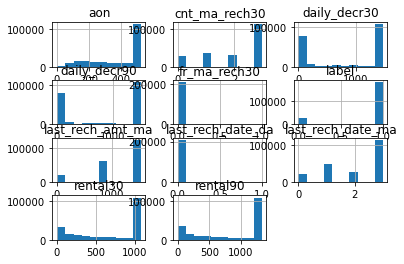

In [117]:
hist = df.iloc[:,0:12].hist()

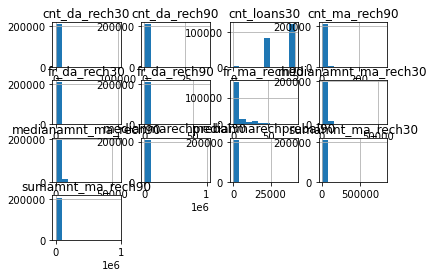

In [118]:
hist = df.iloc[:,12:25].hist()

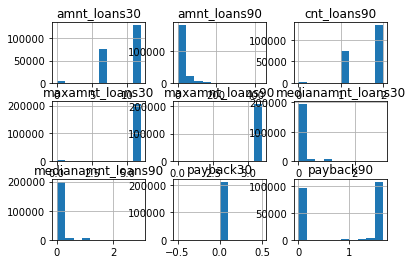

In [119]:

hist = df.iloc[:,25:35].hist()

In [120]:
df=df[colnames]
df1=df.iloc[:,1:]   #does not include Target variable "Label"
df1.head()

,sumamnt_ma_rech90,daily_decr90,sumamnt_ma_rech30,daily_decr30,rental90,medianamnt_ma_rech30,last_rech_amt_ma,medianamnt_ma_rech90,rental30,medianmarechprebal30,aon,medianmarechprebal90,amnt_loans90,cnt_da_rech30,amnt_loans30,cnt_ma_rech90,cnt_ma_rech30,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90
0,3078,1500.000000,3078.0,1469.175667,260.13,1539.0,1539,1539.0,220.13,7.50,272.0,7.50,12,0.0,12,2,2,2.0,21.0,21
1,5787,1500.000000,5787.0,1469.175667,1334.00,5787.0,1539,5787.0,1083.57,61.04,527.0,61.04,12,0.0,12,1,1,3.0,0.0,0
2,1539,1398.000000,1539.0,1398.000000,900.13,1539.0,1539,1539.0,900.13,66.32,527.0,66.32,6,0.0,6,1,1,3.0,0.0,0
3,947,21.228000,0.0,21.228000,159.42,0.0,947,947.0,159.42,0.00,241.0,2.50,12,0.0,12,1,0,3.0,0.0,0
4,23496,150.619333,20029.0,150.619333,1098.90,2309.0,1539,2888.0,1083.57,29.00,527.0,35.00,42,0.0,12,8,3,3.0,2.0,2


In [121]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1) 
df1.loc[:,:] = scaled_values

In [122]:
#Model Building

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = df1


In [125]:
y=df['label']

In [126]:
X.head()

,sumamnt_ma_rech90,daily_decr90,sumamnt_ma_rech30,daily_decr30,rental90,medianamnt_ma_rech30,last_rech_amt_ma,medianamnt_ma_rech90,rental30,medianmarechprebal30,aon,medianmarechprebal90,amnt_loans90,cnt_da_rech30,amnt_loans30,cnt_ma_rech90,cnt_ma_rech30,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90
0,0.003230,1.000000,0.003800,1.000000,0.195000,0.027982,1.000000,0.027982,0.203153,0.000008,0.516129,0.000181,0.027397,0.0,1.0,0.005952,0.666667,0.666667,0.000021,0.238636
1,0.006072,1.000000,0.007144,1.000000,1.000000,0.105218,1.000000,0.105218,1.000000,0.000061,1.000000,0.001472,0.027397,0.0,1.0,0.002976,0.333333,1.000000,0.000000,0.000000
2,0.001615,0.932000,0.001900,0.951554,0.674760,0.027982,1.000000,0.027982,0.830708,0.000066,1.000000,0.001600,0.013699,0.0,0.5,0.002976,0.333333,1.000000,0.000000,0.000000
3,0.000994,0.014152,0.000000,0.014449,0.119505,0.000000,0.615335,0.017218,0.147125,0.000000,0.457306,0.000060,0.027397,0.0,1.0,0.002976,0.000000,1.000000,0.000000,0.000000
4,0.024654,0.100413,0.024724,0.102520,0.823763,0.041982,1.000000,0.052509,1.000000,0.000029,1.000000,0.000844,0.095890,0.0,1.0,0.023810,1.000000,1.000000,0.000002,0.022727


In [127]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [128]:
#Splitting the data

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [130]:
#Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [131]:
#Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

C:\Users\sarmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
#Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [133]:
#Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [134]:
#Looping to find the best Model
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [  acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.70,Random Forest
99.70,Decision Tree
87.74,Logistic Regression
70.96,Naive Bayes


In [135]:
#Among the above models we can see that decision tree and Random forest are performing the best however we will do further evaluations to understand the best model 

In [136]:
#From the above we visualization and distribution we can see that the dataset is not balanced and since the target variable is not so balanced we will try to increase the count of minority

In [65]:
#!pip install imblearn

In [66]:
#!pip install -U imbalanced-learn


In [67]:
#!pip install delayed

In [137]:
from imblearn.over_sampling import SMOTE

In [69]:
#conda install scikit-learn -c conda-forge 

In [138]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 122957
Before OverSampling, counts of label '0': 17470 



In [139]:
sm = SMOTE(random_state =0) 

In [140]:
X_train_res, y_train_res =sm.fit_resample(X_train, y_train.ravel()) 

In [141]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (245914, 20)
After OverSampling, the shape of train_y: (245914,) 

After OverSampling, counts of label '1': 122957
After OverSampling, counts of label '0': 122957


In [142]:
#Now the dataset looks balanced

In [143]:

#Lets run the models with the balanced dataset

In [144]:
#Logistic regression1

In [145]:
lr1 = LogisticRegression(solver='lbfgs', max_iter=400) 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)

In [146]:
acc_log1 = round(lr1.score(X_train_res, y_train_res) * 100, 2)

In [147]:
#Random forest

In [148]:

random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(X_train_res, y_train_res)

Y_prediction = random_forest1.predict(X_test)

random_forest1.score(X_train_res, y_train_res)
acc_random_forest1 = round(random_forest1.score(X_train_res, y_train_res) * 100, 2)

In [149]:
#Gaussian Naive Bayes

In [150]:
gaussian1 = GaussianNB() 
gaussian1.fit(X_train_res, y_train_res)  
Y_pred = gaussian1.predict(X_test)  
acc_gaussian1 = round(gaussian1.score(X_train_res, y_train_res) * 100, 2)

In [151]:
#Decision Tree classifier

In [152]:
decision_tree1 = DecisionTreeClassifier() 
decision_tree1.fit(X_train_res, y_train_res)  
Y_pred = decision_tree1.predict(X_test)  
acc_decision_tree1 = round(decision_tree1.score(X_train_res, y_train_res) * 100, 2)

In [153]:
#Looping to find the best Model
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [  acc_log1, 
              acc_random_forest1, acc_gaussian1,  
              acc_decision_tree1]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.78,Decision Tree
99.76,Random Forest
76.17,Logistic Regression
72.26,Naive Bayes


In [154]:
#We still see that decision tree and random forest performing the best among the model.Lets do a further evaluation on the same

In [155]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train_res, y_train_res, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79867437 0.89488452 0.95714053 0.95518868 0.95656948 0.9578301
 0.95632548 0.95717946 0.95539018 0.9568948 ]
Mean: 0.9346077593912663
Standard Deviation: 0.04890652343050934


In [156]:
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, X_train_res, y_train_res, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.7741542  0.85653871 0.91090599 0.90830351 0.91277297 0.91147168
 0.90626652 0.91187833 0.90996706 0.91293563]
Mean: 0.89151945873528
Standard Deviation: 0.042351537925899733


In [157]:
#From the above we can see that Random forest is performing better with percentage of 93.4 % where as decision tree is only 89.15%

In [158]:
#Feature importance

In [159]:
importances = pd.DataFrame({'feature':X_train_res.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
daily_decr90,0.183
daily_decr30,0.127
aon,0.078
medianmarechprebal90,0.075
sumamnt_ma_rech90,0.066
medianmarechprebal30,0.063
rental90,0.057
rental30,0.055
sumamnt_ma_rech30,0.050


In [98]:
##Hyperparameter tuning

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]} from sklearn.model_selection import GridSearchCV, cross_val_score rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1) clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1) clf.fit(X_train, y_train) clf.bestparams

In [160]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train_res, y_train_res)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train_res, y_train_res)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 93.27 %


In [161]:
#Further evaluation
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train_res, y_train_res, cv=3)
confusion_matrix(y_train_res, predictions)

array([[112363,  10594],
       [  8294, 114663]], dtype=int64)

In [162]:
#Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train_res, predictions))
print("Recall:",recall_score(y_train_res, predictions))

Precision: 0.9154218925888373
Recall: 0.9325455240449914


In [163]:
from sklearn.metrics import f1_score
f1_score(y_train_res, predictions)

0.9239043728395658

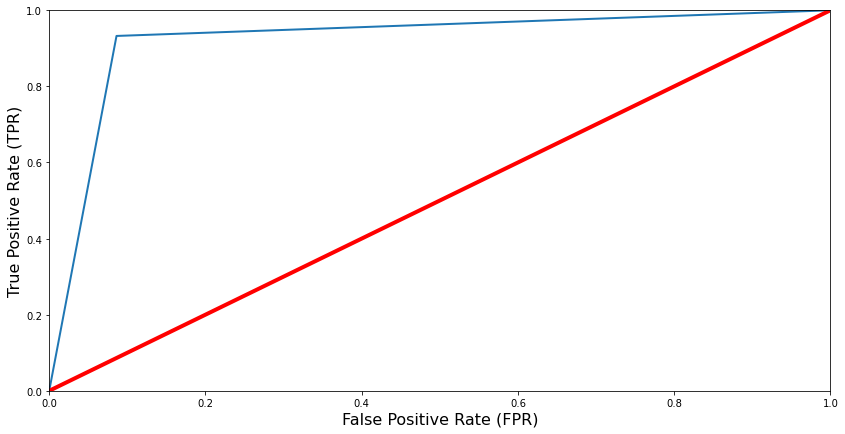

In [164]:

#ROC-AUC Curve

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, predictions)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [165]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train_res, predictions)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9231926608489147


In [166]:
#Model Saving

import pickle
filename='Microcreditdefaulter_Status.pkl'
pickle.dump(random_forest,open(filename,'wb'))

In [167]:
#Conclusion
a=np.array(y_test)
predicted=np.array(random_forest1.predict(X_test))
df_com=pd.DataFrame({"Original":a,"predicted":predicted},index=range(len(a)))
df_com

,Original,predicted
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
69161,1,1
69162,0,1
69163,1,1
69164,0,1


In [ ]:
#Randomforest classifier performed the best and hence has been chosen as the model.